# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [113]:
# %pip install --upgrade plotly

### Import Statements

In [114]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [115]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [116]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [117]:
print(df_data.shape)
# shape is 962 rows, 16 columns

print(df_data.columns)
print(df_data.dtypes)
# col names:  'year', 'category', 'prize', 'motivation', 'prize_share',
    #    'laureate_type', 'full_name', 'birth_date', 'birth_city',
    #    'birth_country', 'birth_country_current', 'sex', 'organization_name',
    #    'organization_city', 'organization_country', 'ISO'
# objects except year

print(df_data.year.min())
# 1901 was first Nobel prize

print(df_data.year.max())
# 2020 is latest year reported



(962, 16)
Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')
year                      int64
category                 object
prize                    object
motivation               object
prize_share              object
laureate_type            object
full_name                object
birth_date               object
birth_city               object
birth_country            object
birth_country_current    object
sex                      object
organization_name        object
organization_city        object
organization_country     object
ISO                      object
dtype: object
1901
2020


**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [118]:
print(df_data[df_data.duplicated()])
# empty - no duplicate data


Empty DataFrame
Columns: [year, category, prize, motivation, prize_share, laureate_type, full_name, birth_date, birth_city, birth_country, birth_country_current, sex, organization_name, organization_city, organization_country, ISO]
Index: []


### Check for NaN Values

In [119]:
print(df_data[df_data.isna()])
# nan columns: year, category, prize, motivation, prize_share, laureate_type, full_name,
# birth_date, birth_city, birth_country, birth_country_current, sex

     year category prize motivation prize_share laureate_type full_name  \
0     NaN      NaN   NaN        NaN         NaN           NaN       NaN   
1     NaN      NaN   NaN        NaN         NaN           NaN       NaN   
2     NaN      NaN   NaN        NaN         NaN           NaN       NaN   
3     NaN      NaN   NaN        NaN         NaN           NaN       NaN   
4     NaN      NaN   NaN        NaN         NaN           NaN       NaN   
..    ...      ...   ...        ...         ...           ...       ...   
957   NaN      NaN   NaN        NaN         NaN           NaN       NaN   
958   NaN      NaN   NaN        NaN         NaN           NaN       NaN   
959   NaN      NaN   NaN        NaN         NaN           NaN       NaN   
960   NaN      NaN   NaN        NaN         NaN           NaN       NaN   
961   NaN      NaN   NaN        NaN         NaN           NaN       NaN   

    birth_date birth_city birth_country birth_country_current  sex  \
0          NaN        NaN    

In [120]:
print(df_data.isna().sum())
# 962 nan values per column -- WRONG, .count() will count both True and False values of .isna() !
# CORRECT: NaN values for motivation, several birth data columns, sex, organization info

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64


In [121]:
column_selection = ['full_name', 'motivation', 'birth_date', 'birth_city', 'birth_country', 'birth_country_current',
               'sex', 'organization_name', 'organization_city', 'organization_country']

df_data.loc[df_data.organization_name.isna()][column_selection]
# some have Nan values due to:
# birth, sex info as they are organizations
# organiation info if they are an individual 


,full_name,motivation,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country
1,Sully Prudhomme,"""in special recognition of his poetic composit...",1839-03-16,Paris,France,France,Male,NaN,NaN,NaN
3,Frédéric Passy,NaN,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN
4,Jean Henry Dunant,NaN,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN
7,Christian Matthias Theodor Mommsen,"""the greatest living master of the art of hist...",1817-11-30,Garding,Schleswig (Germany),Germany,Male,NaN,NaN,NaN
9,Charles Albert Gobat,NaN,1843-05-21,Tramelan,Switzerland,Switzerland,Male,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
932,Nadia Murad,“for their efforts to end the use of sexual vi...,1993-07-02,Kojo,Iraq,Iraq,Female,NaN,NaN,NaN
942,Peter Handke,“for an influential work that with linguistic ...,1942-12-06,Griffen,Austria,Austria,Male,NaN,NaN,NaN
946,Abiy Ahmed Ali,“for his efforts to achieve peace and internat...,1976-08-15,Beshasha,Ethiopia,Ethiopia,Male,NaN,NaN,NaN
954,Louise Glück,“for her unmistakable poetic voice that with a...,1943-04-22,"New York, NY",United States of America,United States of America,Female,NaN,NaN,NaN


### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [122]:
# df_data.year = pd.to_datetime(df_data.year)
# print(df_data.year.dtype)

df_data.birth_date = pd.to_datetime(df_data.birth_date)
print(df_data.birth_date.dtype)

datetime64[ns]


#### Add a Column with the Prize Share as a Percentage

In [123]:
# df_data.columns
df_data.head()

separated_values = df_data.prize_share.str.split('/', expand=True)
numerator, denominator = pd.to_numeric(separated_values[0]), pd.to_numeric(separated_values[1])
df_data['share_pct'] = numerator/denominator

df_data.sample(5)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
891,2015,Chemistry,The Nobel Prize in Chemistry 2015,"""for mechanistic studies of DNA repair""",1/3,Individual,Tomas Lindahl,1938-01-28,Stockholm,Sweden,Sweden,Male,Francis Crick Institute,Hertfordshire,United Kingdom,SWE,0.33
495,1979,Chemistry,The Nobel Prize in Chemistry 1979,"""for their development of the use of boron- an...",1/2,Individual,Herbert C. Brown,1912-05-22,London,United Kingdom,United Kingdom,Male,Purdue University,"West Lafayette, IN",United States of America,GBR,0.50
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00
525,1981,Physics,The Nobel Prize in Physics 1981,"""for his contribution to the development of hi...",1/2,Individual,Kai M. Siegbahn,1918-04-20,Lund,Sweden,Sweden,Male,Uppsala University,Uppsala,Sweden,SWE,0.50
762,2004,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their contributions to dynamic macroecono...",1/2,Individual,Finn E. Kydland,1943-12-01,Gjesdal,Norway,Norway,Male,Carnegie Mellon University,"Pittsburgh, PA",United States of America,NOR,0.50


# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [124]:
import plotly.graph_objects as go

In [125]:
# labels = df_data.sex.unique()
# print(labels)

biology = df_data.sex.value_counts()
print(biology)

fig = px.pie(labels=biology.index, values=biology.values, title='% of Male vs. Female Nobel Prize Winners', hole=.4) 
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show()


sex
Male      876
Female     58
Name: count, dtype: int64


# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [126]:
first_women = df_data[df_data.sex == 'Female'].sort_values('year', ascending=True)
first_women[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


In [127]:
# first 3 women were Marie Curie, Baroness Bertha Sophie Felicitya von..., Selma Ottilia Lovisa
# won prizes for physics, peace, and litearture
# birth countries: poland, czech republic, sweden

# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [128]:
is_winner = df_data.duplicated(subset=['full_name'], keep=False) # returns True value for duplicate winners
multiple_winners = df_data[is_winner].sort_values('full_name')
print(multiple_winners.full_name.value_counts())

multiple_winners

full_name
Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Frederick Sanger                                                                     2
John Bardeen                                                                         2
Linus Carl Pauling                                                                   2
Marie Curie, née Sklodowska                                                          2
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
Name: count, dtype: int64


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,GBR,1.00
505,1980,Chemistry,The Nobel Prize in Chemistry 1980,"""for their contributions concerning the determ...",1/4,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,United Kingdom,Male,MRC Laboratory of Molecular Biology,Cambridge,United Kingdom,GBR,0.25
297,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,United States of America,Male,University of Illinois,"Urbana, IL",United States of America,USA,0.33
424,1972,Physics,The Nobel Prize in Physics 1972,"""for their jointly developed theory of superco...",1/3,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,United States of America,Male,University of Illinois,"Urbana, IL",United States of America,USA,0.33
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,1.00
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,1.00
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25


# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [129]:
df_data.category.nunique()
# 6 categories

6

In [130]:
from matplotlib.pyplot import xlabel, ylabel


prizes_by_category = df_data.category.value_counts()

fig = px.bar(prizes_by_category, prizes_by_category.index, prizes_by_category.values,
             title='Nobel Peace Prizes By Category',
             color=prizes_by_category.values)
fig.update_layout(xaxis_title='Category', yaxis_title='Number of Prizes',
                  coloraxis_showscale=False)
fig.show()

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [131]:
economics = df_data[df_data.category == 'Economics'].sort_values('year', ascending=True)
economics.head()
# first economics prize was 1969, awarded to Jan Tinbergen

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,0.50
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,1.00
411,1971,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for his empirically founded interpretation of...",1/1,Individual,Simon Kuznets,1901-04-30,Pinsk,Russian Empire (Belarus),Belarus,Male,Harvard University,"Cambridge, MA",United States of America,BLR,1.00
419,1972,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their pioneering contributions to general...",1/2,Individual,John R. Hicks,1904-04-08,Warwick,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR,0.50


# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [132]:
sex_counts_by_category = df_data.groupby(['category', 'sex'],
                                         as_index=False).agg(
                                             {'prize': pd.Series.count}
                                         )

sex_counts_by_category.sort_values('prize', ascending=False, inplace=True)

fig = px.bar(x = sex_counts_by_category.category,
             y = sex_counts_by_category.prize,
             color = sex_counts_by_category.sex,
             title = 'Male and Female Nobel Prize Receipients by Category')

fig.update_layout(xaxis_title = 'Category',
                  yaxis_title = 'Number of Prizes')

fig.show()


# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


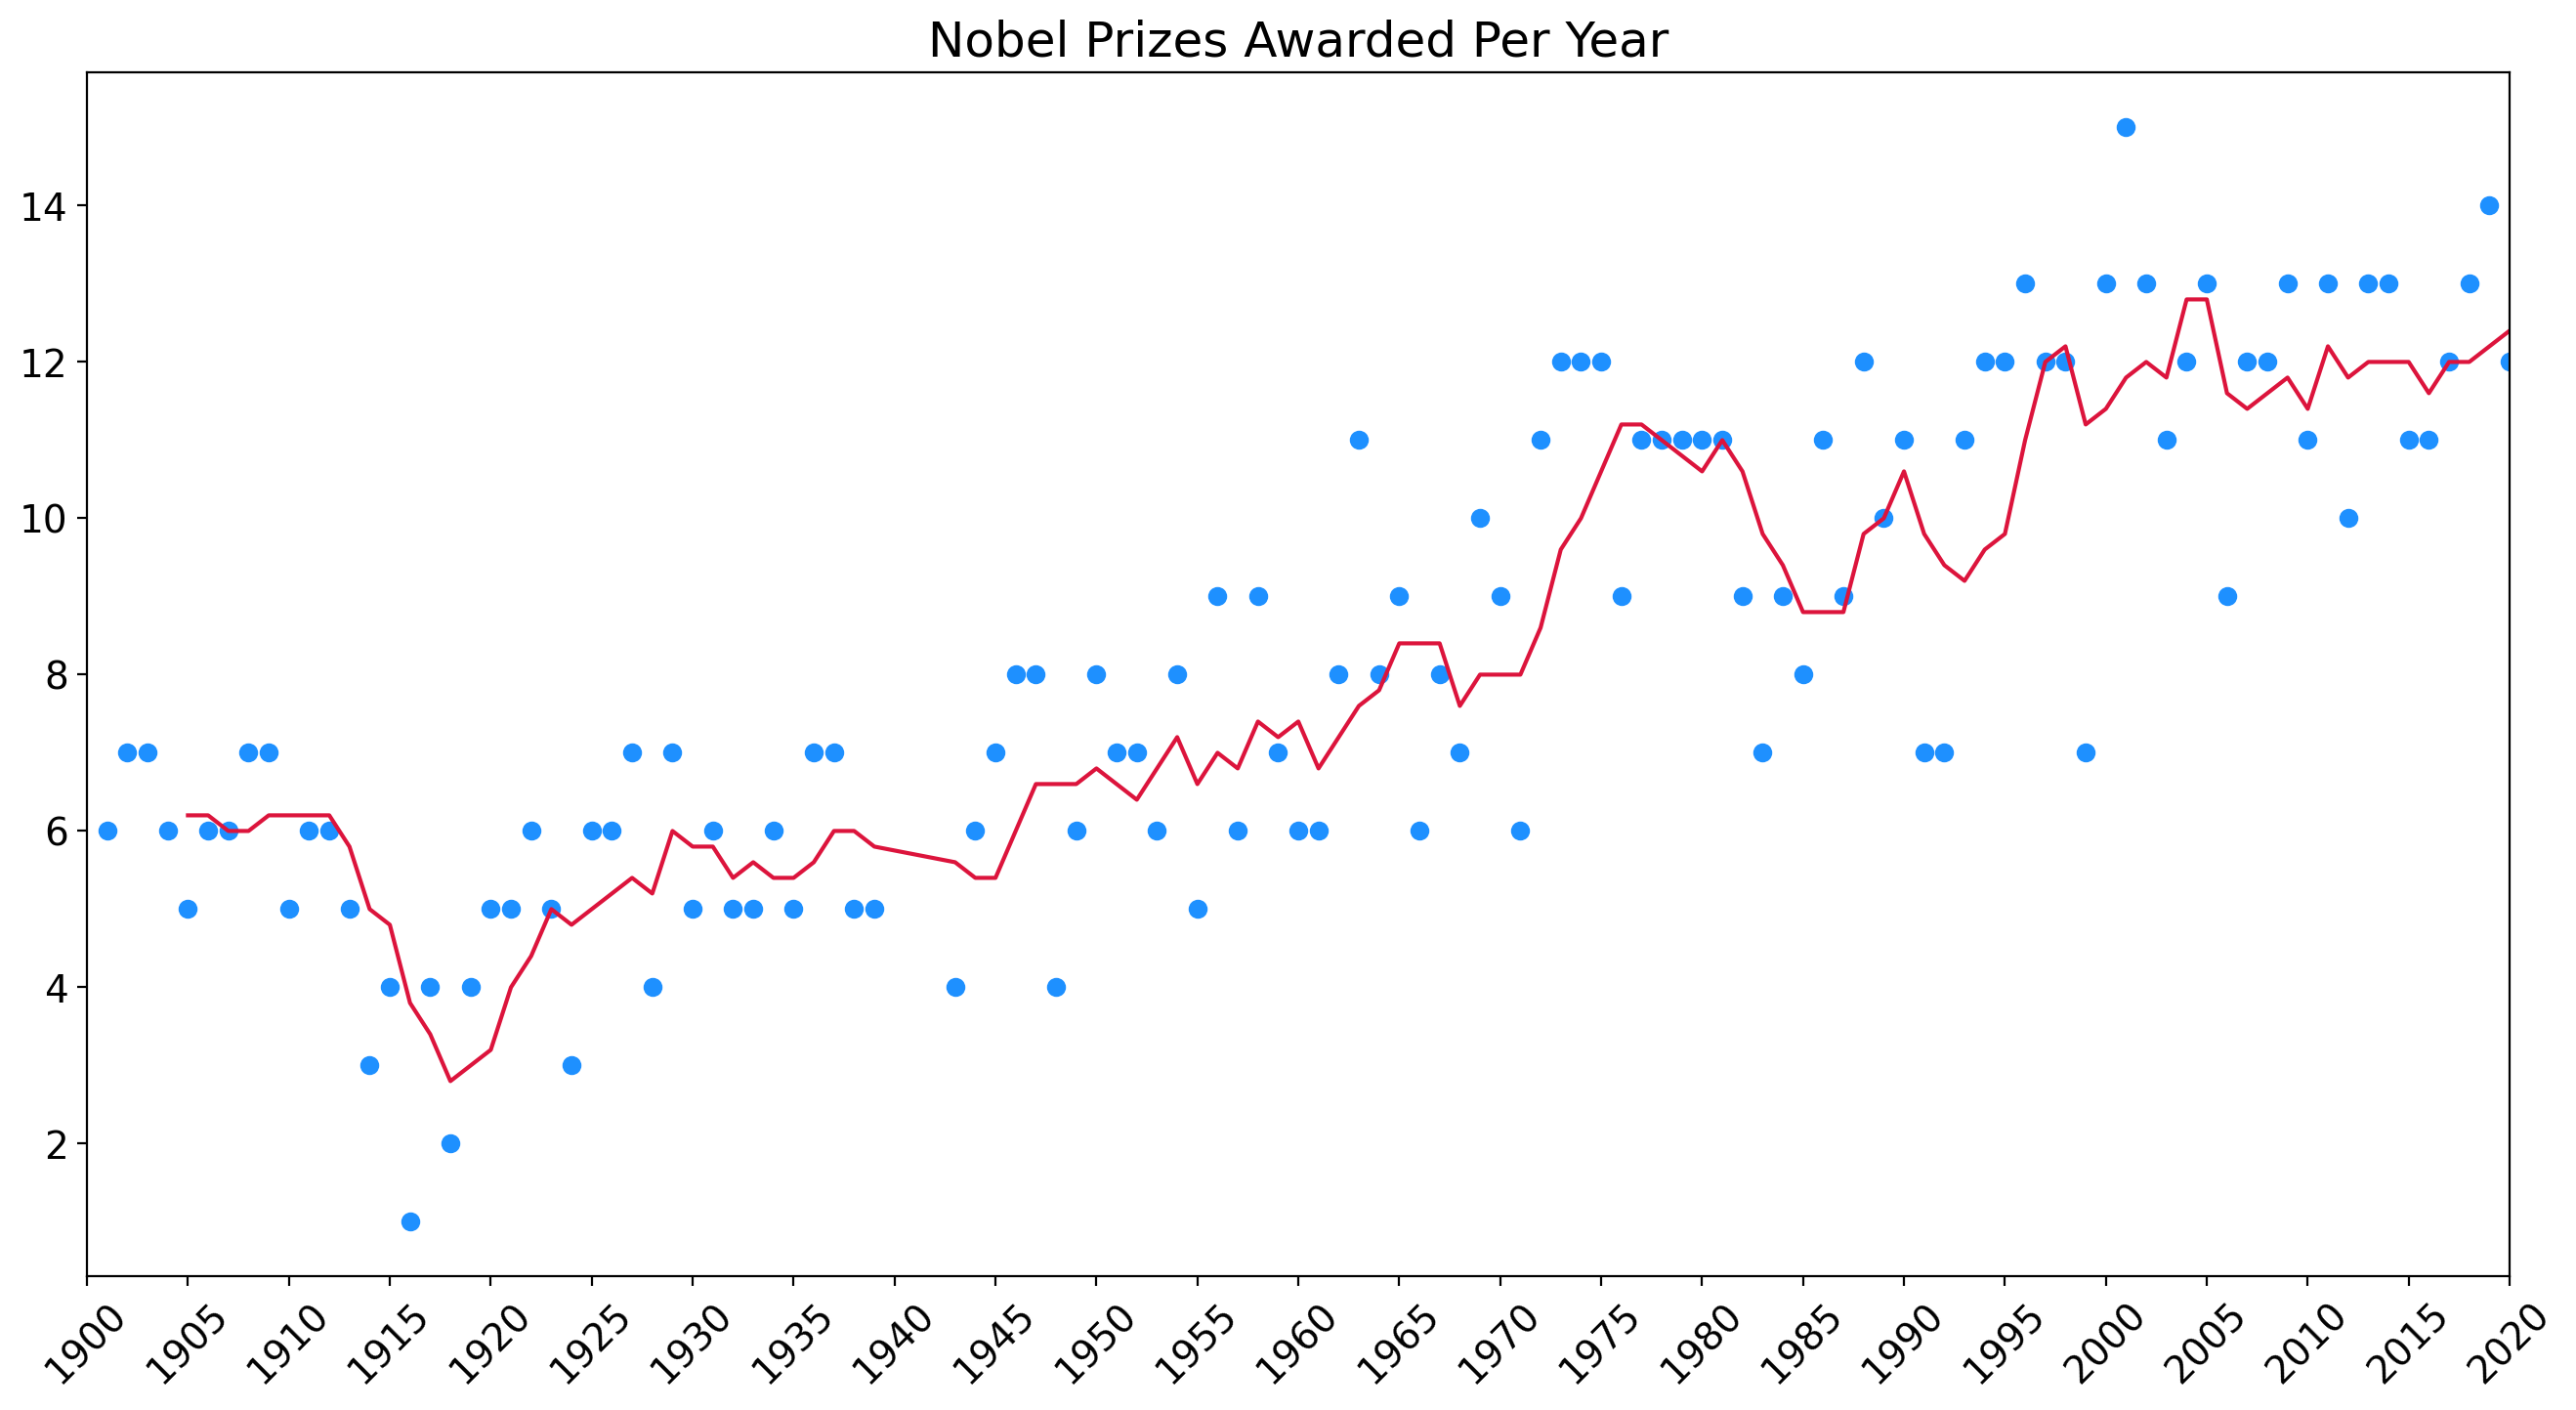

In [133]:
# set up data frame to have years and prize counts
prize_per_year = df_data.groupby('year').count().prize

# calculate moving average
moving_average = prize_per_year.rolling(window=5).mean()

# set up tick marks for x axis
tick_marks = np.arange(1900,2021,5) # start, stop, step

# configure plot settings
plt.figure(figsize=(16,8), dpi=200)
plt.title('Nobel Prizes Awarded Per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=tick_marks,
           fontsize=14, rotation=45)

# get axes, set x axis limits
ax = plt.gca()
ax.set_xlim(1900,2020)

# plot scatter data
ax.scatter(x=prize_per_year.index,
            y=prize_per_year.values,
            color='dodgerblue')

# plot moving average data
ax.plot(prize_per_year.index,
         moving_average.values,
         color='crimson')

plt.show()


In [134]:
# there do appear to be dips during wartime
# overall upward trend in the chart likely due to more research done in general,
# and increased discovery of prizeworthy human efforts, etc
# better answer: the addition of Economics awards


# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [135]:
# create df for average prize share, calculate 5 year moving average
avg_prize_share = df_data.groupby('year').agg({'share_pct': pd.Series.mean})
share_moving_average = avg_prize_share.rolling(window=5).mean()

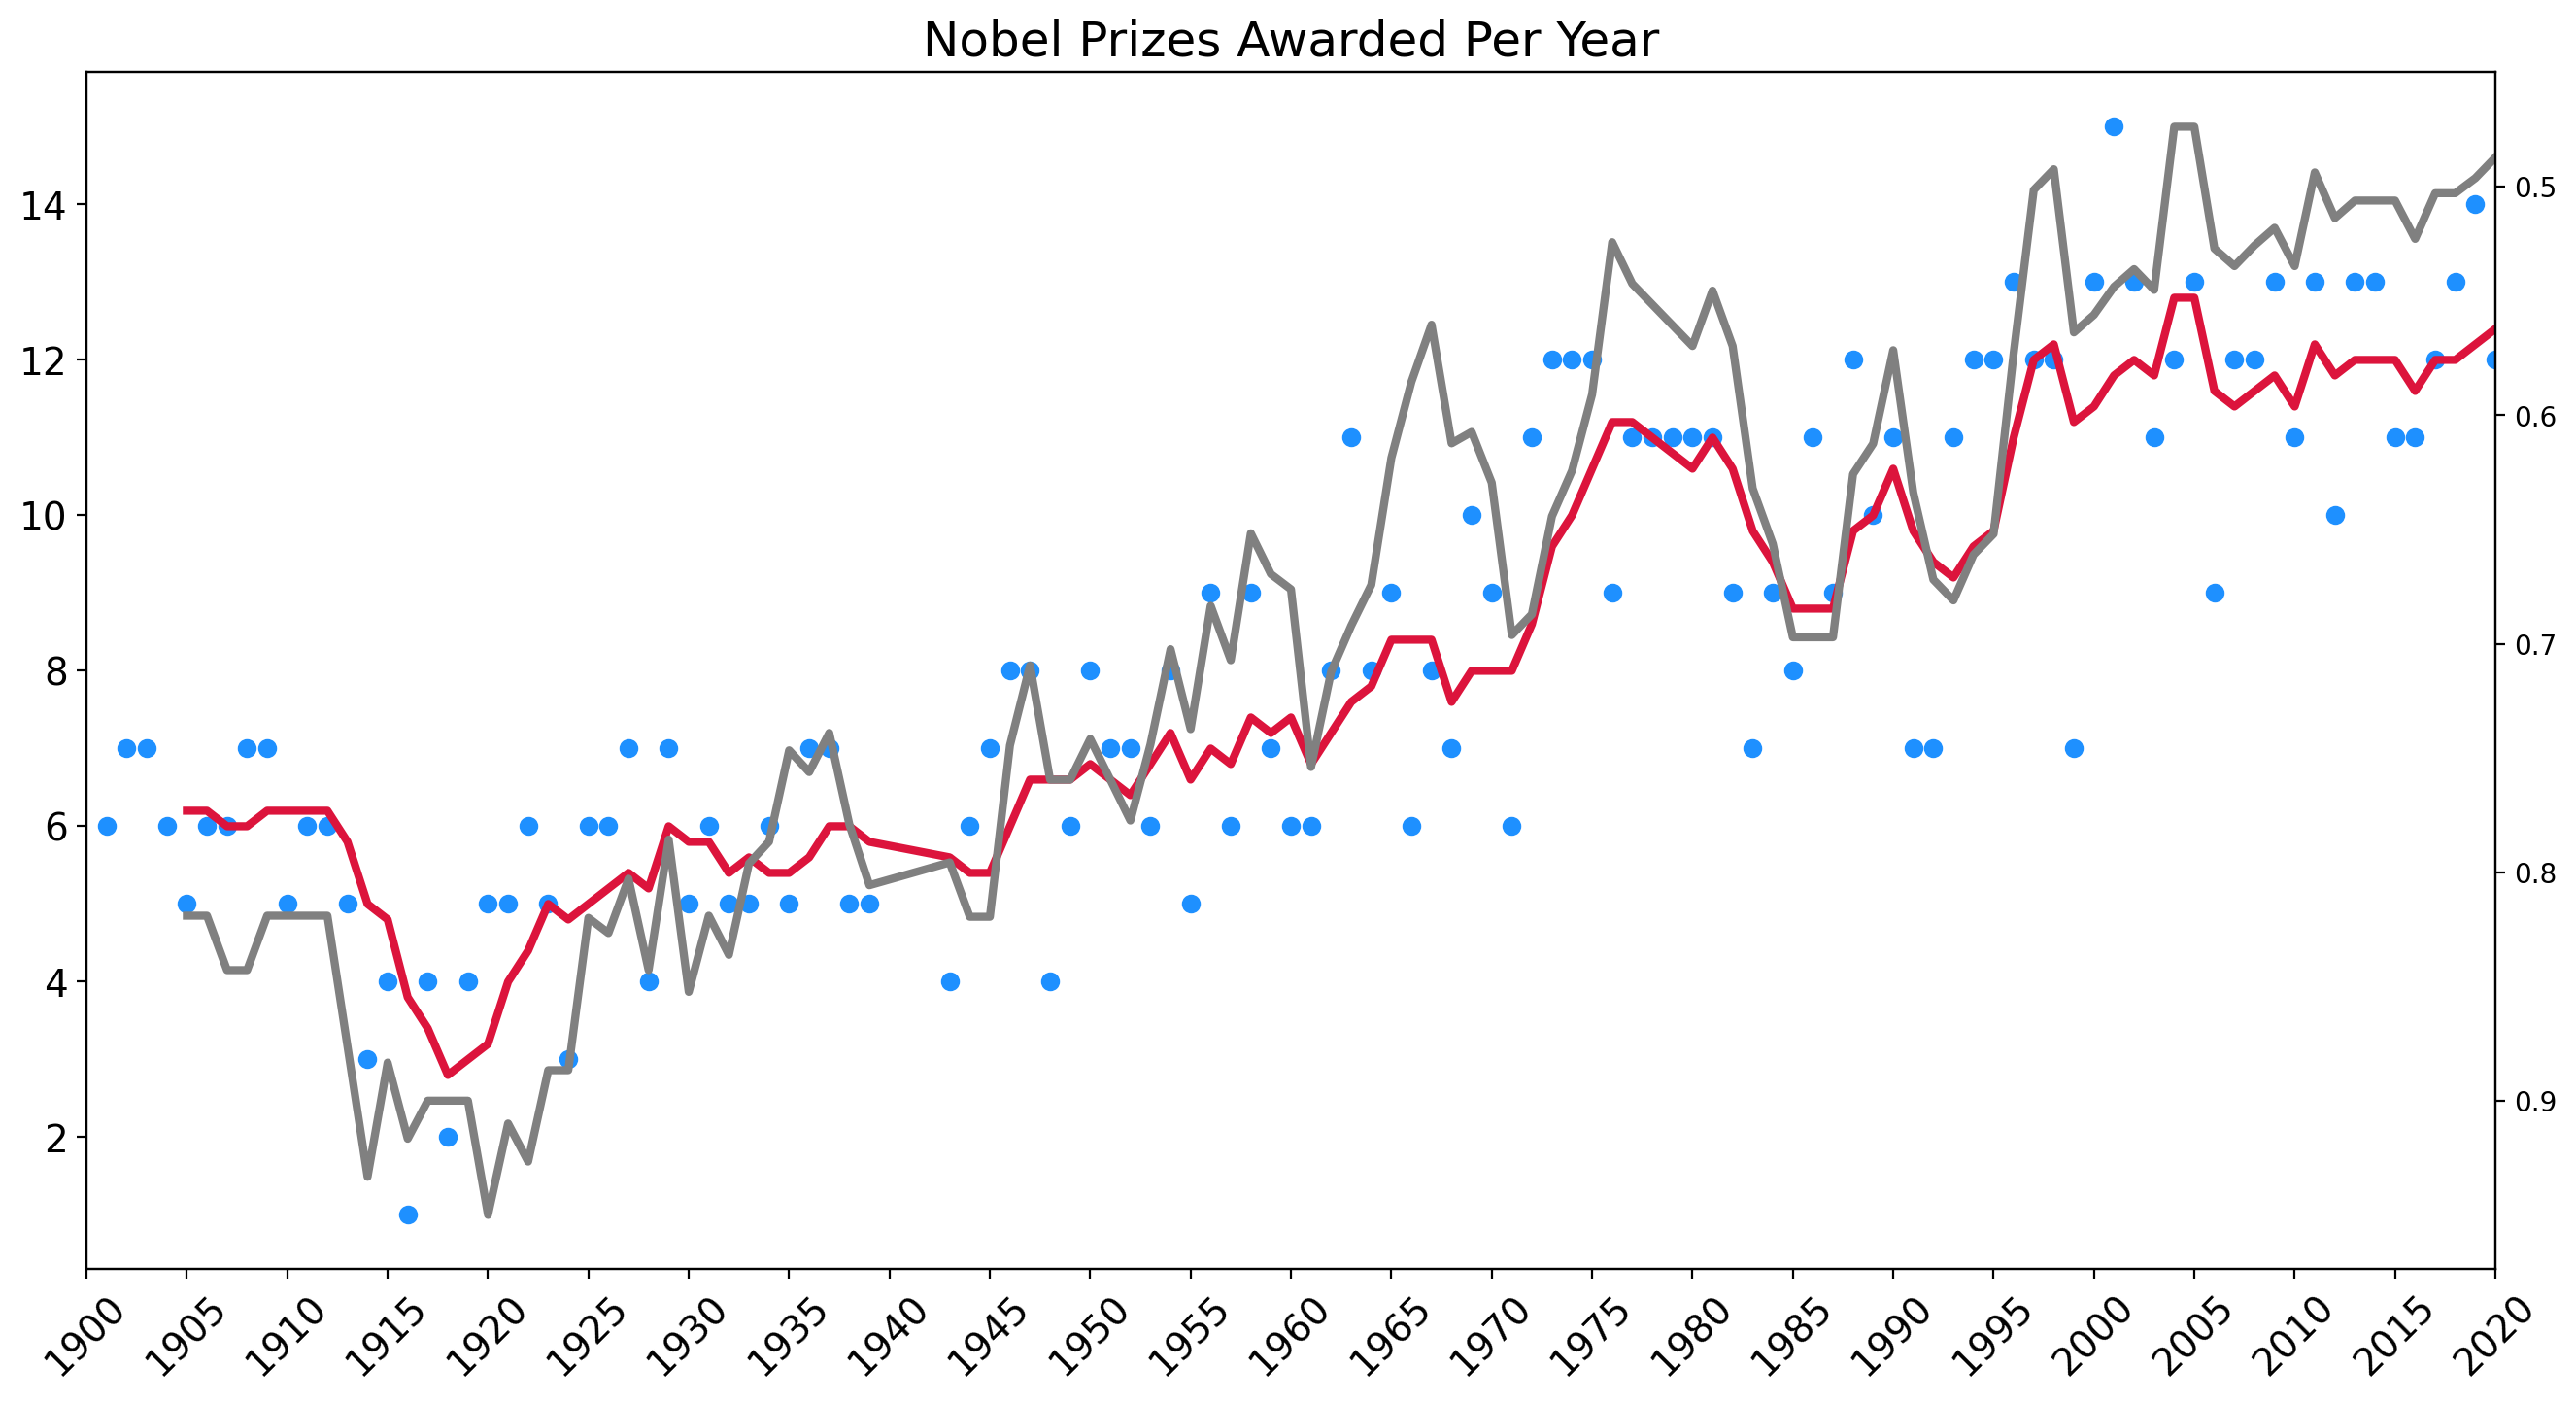

In [136]:
# set up tick marks for x axis
tick_marks = np.arange(1900,2021,5) # start, stop, step

# configure plot settings
plt.figure(figsize=(16,8), dpi=200)
plt.title('Nobel Prizes Awarded Per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=tick_marks,
           fontsize=14, rotation=45)

# get axes, set x axis limits
ax1 = plt.gca()
ax2 = ax1.twinx()
# invert y axis
ax2.invert_yaxis()
ax1.set_xlim(1900,2020)

# plot scatter data
ax1.scatter(x=prize_per_year.index,
            y=prize_per_year.values,
            color='dodgerblue')

# plot moving average data
ax1.plot(prize_per_year.index,
         moving_average.values,
         color='crimson',
         linewidth=3)

# add prize share moving average
ax2.plot(prize_per_year.index,
         share_moving_average.values,
         color='grey',
         linewidth=3)

plt.show()

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [137]:
# df_data.shape # 962 rows
print(df_data.columns)

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO', 'share_pct'],
      dtype='object')


In [138]:
# df_data[df_data.birth_country.isna()].shape # 28 NaN values
# df_data[df_data.birth_country_current.isna()].shape # 28 NaN values
# df_data[df_data.organization_country.isna()].shape # 28 rows # 254 NaN values - use birth country data and omit organizations?

top_20_countries = df_data.groupby('birth_country_current').agg({'prize': pd.Series.count})
top_20_countries.sort_values(by='prize', ascending=True, inplace=True)
top_20_countries = top_20_countries[-20:] # reminder - slice here is start:end, so start 20 items from end and go to end
top_20_countries

,prize
birth_country_current,
Belgium,9
Hungary,9
India,9
Australia,10
Denmark,12
Norway,12
China,12
Netherlands,18
Austria,18


In [139]:
h_bar = px.bar(x=top_20_countries.prize,
               y=top_20_countries.index,
               color=top_20_countries.prize,
               color_continuous_scale='Viridis',
               title='Nobel Prize Awards By Country')

h_bar.update_layout(xaxis_title='No. of Prizes Awarded',
                    yaxis_title='Country')

h_bar.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [140]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO', 'share_pct'],
      dtype='object')

In [141]:
df_countries = df_data.groupby(['birth_country_current', 'ISO'], 
                               as_index=False).agg({'prize': pd.Series.count})

df_countries.sort_values('prize', ascending=False)

fig = px.choropleth(df_countries, locations='ISO',
                    color="prize",
                    hover_name='birth_country_current',
                    color_continuous_scale=px.colors.sequential.matter,
                    title='Nobel Prizes by Country')

fig.update_layout(coloraxis_showscale=True)

fig.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [142]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO', 'share_pct'],
      dtype='object')

In [143]:
# note to self: as_index is important here otherwise birth country col will become the index, 
# which will cause issues with merging later
country_categories = df_data.groupby(['birth_country_current', 'category'], as_index=False).agg({'prize': pd.Series.count})

country_categories.sort_values(by='prize', ascending=False, inplace=True)

In [144]:
country_categories

,birth_country_current,category,prize
204,United States of America,Medicine,78
206,United States of America,Physics,70
201,United States of America,Chemistry,55
202,United States of America,Economics,49
198,United Kingdom,Medicine,28
...,...,...,...
97,Iraq,Peace,1
99,Ireland,Medicine,1
100,Ireland,Physics,1
102,Israel,Economics,1


In [145]:
top_20_countries

,prize
birth_country_current,
Belgium,9
Hungary,9
India,9
Australia,10
Denmark,12
Norway,12
China,12
Netherlands,18
Austria,18


In [151]:
merged_df = pd.merge(country_categories, top_20_countries, on='birth_country_current')
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize']
merged_df.sort_values(by='total_prize', inplace=True)
merged_df


,birth_country_current,category,cat_prize,total_prize
109,India,Physics,1,9
108,India,Peace,1,9
88,Belgium,Peace,3,9
89,Belgium,Medicine,3,9
90,Belgium,Chemistry,1,9
...,...,...,...,...
4,United States of America,Peace,19,281
3,United States of America,Economics,49,281
2,United States of America,Chemistry,55,281
1,United States of America,Physics,70,281


In [153]:
cat_country_bar = px.bar(merged_df, x='cat_prize', y='birth_country_current',
                         color='category', orientation='h', title='Top 20 Countries by Number of Nobel Prizes Received')

cat_country_bar.update_layout(xaxis_title='No. of Prizes by Category',
                              yaxis_title = 'Country')

cat_country_bar.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [154]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50


In [162]:
prizes_by_year = df_data.groupby(['birth_country_current', 'year'], as_index=False).agg({'prize': pd.Series.count})
prizes_by_year.sort_values('prize', inplace=True)
prizes_by_year

,birth_country_current,year,prize
0,Algeria,1957,1
359,Poland,1954,1
357,Poland,1944,1
356,Poland,1943,1
355,Poland,1939,1
...,...,...,...
622,United States of America,2020,7
596,United States of America,1993,7
577,United States of America,1972,8
594,United States of America,1990,8


In [163]:
cumulative_prizes = prizes_by_year.groupby(['birth_country_current', 'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True)

cumulative_prizes

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,2
2,Argentina,1936,1
3,Argentina,1947,2
4,Argentina,1980,3
...,...,...,...
622,United States of America,2020,281
623,Venezuela,1980,1
624,Vietnam,1973,1
625,Yemen,2011,1


In [166]:
prizes_over_time = px.line(cumulative_prizes, x='year', y='prize',
                           color = 'birth_country_current', hover_name='birth_country_current',
                           title = 'Cumulative Nobel Prizes by Country Over Time')

prizes_over_time.update_layout(xaxis_title='Year', yaxis_title = 'Prize Count')

prizes_over_time.show()

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 
